# March Madness Power Ranking Project

March Madness is a College Basketball Tournament held in March with 68 teams in the Tournement. the tournament is broken into 4 sections: "South", "North", "West", "Midwest". from these 4 sections, teams are ranked from 1-16 with 8 teams playing into the tournement. The draw to March Madness is the upsets in the barcket versus high seeds. Another draw is, nobody has ever gotten a perfect brackets

Here are some of the "Madness" that happened in the tournement in 2023:

- Furman, a 13-seed beating 4-seed Virginia & Fairleigh Dickinson University, a 16-seed beat 1-seed Purdue (2nd time to ever happened) in the 1st round
- Princeton, a 15-seed making it to the sweet 16 (where 16 team remain)
- Florida Atlantic, a 9-seed made it all the way to the Final Four (where 4 teams remained).

You can check out the 2023 March Madness Bracket Results with this link - https://www.ncaa.com/march-madness-live/bracket

People can create brackets pedicting the out come of the tournament. Most brackets will be scored out of 192 points. For correctly guessing the teams based on each round is how many points you earn on your bracket, typically the scoring goes as:

- Round of 32 (2nd round): 1 points
- Sweet 16 (16 teams left): 2 points
- Elite 8 (8 teams left): 4 points
- Final 4 (4 teams left): 8 points
- Championship Game (2 teams left): 16 points
- Champion: 32 points

The more correct selections you make deeper into the bracket the more points you earn. the hardest part of these brackets is they are locked at the beginning of the tournament. 1st round upsets could completely destroy your bracket. From the highlights of the tournament I outlined earlier, imagine picking Purdue to be your champion. then comes along Fairleigh Dickinson University in the 1st round to knock out Purdue. That's part of the excitement and fun of creating these brackets, IT'S MADNESS!

As someone who doesn't watch college basketball until the tournament, I created this project to help users with their march madness brackets. I had great success with my projections in 2023. entering 2 pools, finishing 19th in a pool of 417 and 9th in a pool of 118. My worst finish was in the top 8% in those 2 bracket pools

## Gathering and Cleaning Data

1st thing's 1st is we will need to gather the data. I will be collecting the data from https://www.sports-reference.com/cbb/. I have already uploaded 2 CSV files onto my GitHub that we will be leveraging, Team Stats and Opponent Stats. I will also be leveraging packages Pandas and Seaborn

In [1]:
#Importing Packages

import pandas as pd
import seaborn as sns

In [2]:
#Importing Data

team_df = pd.read_csv('https://raw.githubusercontent.com/JoshKepler/Portfolio/main/March%20Madness%202023%20Project/NCAA%202022%20Team%20Stats.csv')
opp_df = pd.read_csv('https://raw.githubusercontent.com/JoshKepler/Portfolio/main/March%20Madness%202023%20Project/NCAA%202022%20Opp%20Stats.csv')

Next, I will need to combine these table and clean up the data since we dont care about the teams not in the "NCAA Tournament"

In [3]:
#Data Cleanup - Remove Unessecary Columns & Merge dataframes

team_df = team_df.drop(['G','W','L','W-L%', 'W.1','L.1','W.2','L.2','W.3','L.3'], axis=1)
opp_df = opp_df.drop(['G','W','L','W-L%', 'W.1','L.1','W.2','L.2','W.3','L.3'], axis=1)
stats_df = team_df.merge(opp_df, on='School', suffixes=['', '_opp'])

In [5]:
#More Data Cleanup 

#Filter by Tournament Teams
Tournament_df = stats_df[stats_df['NCAA Tournament?'] == 'Y']
#Drop Redundent Columns
Tournament_df = Tournament_df.drop(['NCAA Tournament?_opp','SRS_opp','Tm._opp','Opp._opp', 'MP_opp', 'SOS_opp'], axis=1)

#Adding Defensive Rebounds for later use
Tournament_df['DRB'] = Tournament_df['TRB'] - Tournament_df['ORB']
Tournament_df['DRB_opp'] = Tournament_df['TRB_opp'] - Tournament_df['ORB_opp']

Tournament_df

,School,NCAA Tournament?,SRS,SOS,Tm.,Opp.,MP,FG,FGA,FG%,...,FT%_opp,ORB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp,DRB,DRB_opp
3,Alabama,Y,23.18,9.64,3027,2526,1510,1023,2314,0.442,...,0.711,452,1383,364,268,142,434,737,1168,931
10,Arizona,Y,19.08,8.34,2866,2490,1400,1023,2072,0.494,...,0.713,360,1163,443,276,122,431,671,1020,803
11,Arizona State,Y,11.29,8.17,2559,2447,1455,910,2163,0.421,...,0.707,423,1382,458,219,107,505,652,920,959
12,Arkansas,Y,15.98,9.87,2666,2446,1445,961,2063,0.466,...,0.714,348,1189,382,241,103,519,681,899,841
16,Auburn,Y,14.34,9.28,2474,2302,1365,875,1991,0.439,...,0.710,401,1211,380,238,118,442,610,835,810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Vermont,Y,1.65,-3.11,2471,2276,1377,901,1901,0.474,...,0.724,241,1103,380,171,90,389,527,845,862
339,Virginia,Y,13.28,5.98,2237,1996,1325,793,1765,0.449,...,0.748,262,1055,377,159,123,403,536,791,793
340,Virginia Commonwealth,Y,9.90,1.95,2480,2202,1400,864,1867,0.463,...,0.704,358,1157,405,229,124,572,689,837,799
348,West Virginia,Y,15.94,10.88,2583,2411,1365,882,1953,0.452,...,0.726,319,1062,420,227,82,496,728,769,743


## How we will leverage the data

Now that we cleaned up the data. time to start crunching that data! We can start the analysis now. I am a firm believer of "Dont reinvent the wheel". we will be leveraging Dean Oliver's basketball wisdom.

One of the "trailblazers" of Basketball Analytics is Dean Oliver, (pun intended). He pioneered the 4 factors of basketball success. These 4 factors and their percentages are:

- Shooting(40%)
- Turnovers(25%)
- Rebounds(20%)
- Free Throws(15%)

If you would like to know more about Dean Oliver and his work. Here is a link to his Wikipedia page:

https://en.wikipedia.org/wiki/Dean_Oliver_(statistician)

We will be leveraging Dean's formula to basketball wins based off of this article, I found doing research on 4 Factors of Basketball Success by Justin Jacobs:

https://squared2020.com/2017/09/05/introduction-to-olivers-four-factors/

After reading through this article, I decied to follow the articles Regression Analysis Formula:

![image-3](image-3.png)

I used the following Betas provided in the article:

- Beta 1: 351.1146
- Beta 2: -287.2934
- Beta 3: 137.1432
- Beta 4: 41.0642
- Beta 5: -409.9348
- Beta 6: 289.4278
- Beta 7: 58.7066
- Beta 8: -70.4028

If you havent noticed yet, I dont have some of the statistics required for the analysis. Let's add those stats to our DataFrame!

## Leveraging the Data

In [6]:
#Let's crate a new DataFrame for our 4 Successes along with the stats needed in the previous Dateframe
Four_Factor = Tournament_df[['School', 'FT%', 'FT%_opp']]

#Lets calculate the effective FG% as eFG%  
Four_Factor['Team eFG%'] = (Tournament_df['FG']+.5*Tournament_df['3P'])/Tournament_df['FGA']
Four_Factor['Opp eFG%'] = (Tournament_df['FG_opp']+.5*Tournament_df['3P_opp'])/Tournament_df['FGA_opp']

#Finding the ORB%
Four_Factor['ORB%'] = Tournament_df['ORB']/(Tournament_df['ORB']+Tournament_df['DRB_opp'])
Four_Factor['DRB%'] = Tournament_df['DRB']/(Tournament_df['ORB_opp']+Tournament_df['DRB'])

#Adding Turnover%
Four_Factor['TOV%'] = Tournament_df['TOV']/(Tournament_df['FGA']+.44*Tournament_df['FTA']+Tournament_df['TOV'])
Four_Factor['TOV%_opp'] = Tournament_df['TOV_opp']/(Tournament_df['FGA_opp']+.44*Tournament_df['FTA_opp']+Tournament_df['TOV_opp'])


Four_Factor

C:\Users\jkepler\AppData\Local\Temp/ipykernel_14248/4128401033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Four_Factor['Team eFG%'] = (Tournament_df['FG']+.5*Tournament_df['3P'])/Tournament_df['FGA']
C:\Users\jkepler\AppData\Local\Temp/ipykernel_14248/4128401033.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Four_Factor['Opp eFG%'] = (Tournament_df['FG_opp']+.5*Tournament_df['3P_opp'])/Tournament_df['FGA_opp']
C:\Users\jkepler\AppData\Local\Temp/ipykernel_14248/4128401033.py:9: SettingWithCopyW

,School,FT%,FT%_opp,Team eFG%,Opp eFG%,ORB%,DRB%,TOV%,TOV%_opp
3,Alabama,0.725,0.711,0.521175,0.413071,0.342049,0.720988,0.160044,0.137179
10,Arizona,0.708,0.713,0.564913,0.470894,0.307161,0.739130,0.163266,0.148847
11,Arizona State,0.689,0.707,0.484050,0.465410,0.291728,0.685034,0.146426,0.173547
12,Arkansas,0.698,0.714,0.509210,0.471693,0.307249,0.720930,0.159171,0.181359
16,Auburn,0.696,0.710,0.494977,0.456848,0.328358,0.675566,0.152031,0.163227
...,...,...,...,...,...,...,...,...,...
337,Vermont,0.697,0.724,0.550763,0.513398,0.203327,0.778085,0.129424,0.157256
339,Virginia,0.703,0.748,0.511615,0.482819,0.256098,0.751187,0.121724,0.173791
340,Virginia Commonwealth,0.696,0.704,0.519550,0.468996,0.288513,0.700418,0.174859,0.209104
348,West Virginia,0.743,0.726,0.515105,0.508885,0.340142,0.706801,0.161092,0.185843


In [7]:
#Now to implement our formula, for this scenario I did ignore the Standard Error and I will be rounding the Coefficient to 2 decimal points

Four_Factor['4 Factor Rating'] = (351.11 * Four_Factor['Team eFG%'])+(-287.29* Four_Factor['TOV%'])+(137.14 * Four_Factor['ORB%'])+(41.06*Four_Factor['FT%'])+(-409.93*Four_Factor['Opp eFG%'])+(289.43*Four_Factor['TOV%_opp'])+(58.71 * Four_Factor['DRB%'])+(-70.4*Four_Factor['FT%_opp'])

#Sorting and adding 4 Factor ranking column
Four_Factor = Four_Factor.sort_values('4 Factor Rating', ascending=False)
Four_Factor['4 Factor Rank'] = Four_Factor['4 Factor Rating'].rank(ascending=False)

#Cleaning up Dataframe and setting index
Four_Factor['School'] = Four_Factor['School'].astype('string')
Four_Factor['School'] = Four_Factor['School'].str.strip()
Four_Factor = Four_Factor.set_index('School')

#Preview Table
Four_Factor

C:\Users\jkepler\AppData\Local\Temp/ipykernel_14248/1083124824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Four_Factor['4 Factor Rating'] = (351.11 * Four_Factor['Team eFG%'])+(-287.29* Four_Factor['TOV%'])+(137.14 * Four_Factor['ORB%'])+(41.06*Four_Factor['FT%'])+(-409.93*Four_Factor['Opp eFG%'])+(289.43*Four_Factor['TOV%_opp'])+(58.71 * Four_Factor['DRB%'])+(-70.4*Four_Factor['FT%_opp'])


,FT%,FT%_opp,Team eFG%,Opp eFG%,ORB%,DRB%,TOV%,TOV%_opp,4 Factor Rating,4 Factor Rank
School,,,,,,,,,,
Houston,0.733,0.689,0.522923,0.426798,0.371182,0.723261,0.129695,0.184467,99.734479,1.0
Connecticut,0.761,0.735,0.539434,0.444289,0.384382,0.739914,0.159563,0.164641,84.741577,2.0
Tennessee,0.708,0.719,0.498808,0.428496,0.364207,0.731474,0.153331,0.195223,83.281171,3.0
UCLA,0.731,0.697,0.510690,0.467871,0.330174,0.717514,0.128505,0.206209,78.630087,4.0
Alabama,0.725,0.711,0.521175,0.413071,0.342049,0.720988,0.160044,0.137179,76.336293,5.0
...,...,...,...,...,...,...,...,...,...,...
Michigan State,0.759,0.720,0.516975,0.486026,0.276079,0.748142,0.145308,0.130948,40.694573,64.0
Iowa,0.738,0.746,0.516851,0.532795,0.321486,0.726212,0.120494,0.162223,39.907043,65.0
Fairleigh Dickinson,0.752,0.743,0.517301,0.541242,0.318657,0.710438,0.141082,0.193410,39.185722,66.0


From our 4 Factor Ratings, Houston was our favorite to win, unfortunetly their run ended in the 2nd Round. I will talk more about the hits and missing later on.

lets run our 1st round matchups, so we dont have to sort through all this data over and over again

<AxesSubplot:xlabel='4 Factor Rank', ylabel='4 Factor Rating'>

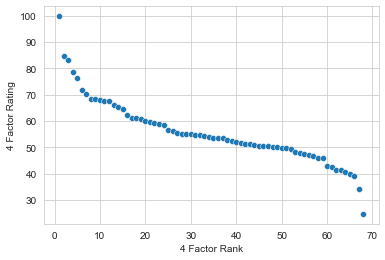

In [8]:
#Lets throw this data into a chart for some visual representation

sns.set_style('whitegrid')
sns.scatterplot(data = Four_Factor, x='4 Factor Rank', y='4 Factor Rating')

As you can see from our scatter plot above, we have about 5-6 teams that are above the rest of the field. Those teams being Houston, Connecticut, Tennessee, UCLA, Alabama and shockingly Florida Atlantic. The remainder of the field being between 70ish all the way to 40ish, with Southeast Missouri and Texas Southern tailing off

## Mocking the 1st round of the NCAA Tournament

In [9]:
#lets mock our 1st round of games!

matchups = [['West Virginia', 'Maryland'],
            ['Furman', 'Virginia'],
            ['Utah State', 'Missouri'],
            ['Howard','Kansas'],
            ['Texas A&M-Corpus Christi', 'Alabama'],
            ['College of Charleston', 'San Diego State'],
            ['Princeton', 'Arizona'],
            ['Illinois', 'Arkansas'],
            ['Auburn', 'Iowa'],
            ['Oral Roberts', 'Duke'],
            ['Colgate', 'Texas'],
            ['Boise State', 'Northwestern'],
            ['Northern Kentucky', 'Houston'],
            ['Louisiana', 'Tennessee'],
            ['Penn State', 'Texas A&M'],
            ['UNC Asheville', 'UCLA'],
            ['Southern California', 'Michigan State'],
            ['Kennesaw State', 'Xavier'],
            ['UC Santa Barbara', 'Baylor'],
            ['Virginia Commonwealth', 'Saint Mary\'s (CA)'],
            ['Vermont', 'Marquette'],
            ['Pittsburgh', 'Iowa State'],
            ['NC State', 'Creighton'],
            ['Iona', 'Connecticut'],
            ['Fairleigh Dickinson', 'Purdue'],
            ['Providence', 'Kentucky'],
            ['Drake', 'Miami (FL)'],
            ['Grand Canyon', 'Gonzaga'],
            ['Florida Atlantic', 'Memphis'],
            ['Montana State', 'Kansas State'],
            ['Kent State', 'Indiana'],
            ['TCU', 'Arizona State']
           ]


In [10]:
#loop thorugh matchups


for game in matchups:
    team1 = game[0]
    team2 = game[1]
    
    team1_4f = Four_Factor.loc[team1, '4 Factor Rating']
    team2_4f = Four_Factor.loc[team2, '4 Factor Rating']

    if team1_4f>team2_4f:
        temp = abs(team1_4f - team2_4f)
        print(str(team1), ' is favored by ', str(temp), ' in our 4 Factor Rating against ', str(team2))
    else:
        temp = abs(team2_4f - team1_4f)
        print(str(team2), 'is favored by', str(temp), 'in our 4 Factor Rating against', str(team1))

Maryland is favored by 3.0664884215004875 in our 4 Factor Rating against West Virginia
Furman  is favored by  6.6215188396886475  in our 4 Factor Rating against  Virginia
Utah State  is favored by  7.997852122863058  in our 4 Factor Rating against  Missouri
Kansas is favored by 15.725339854537623 in our 4 Factor Rating against Howard
Alabama is favored by 25.870373880751394 in our 4 Factor Rating against Texas A&M-Corpus Christi
College of Charleston  is favored by  12.935964675618855  in our 4 Factor Rating against  San Diego State
Arizona is favored by 15.32528119910478 in our 4 Factor Rating against Princeton
Illinois  is favored by  0.045273478196776296  in our 4 Factor Rating against  Arkansas
Auburn  is favored by  13.46201742015819  in our 4 Factor Rating against  Iowa
Oral Roberts  is favored by  9.248611622526163  in our 4 Factor Rating against  Duke
Texas is favored by 8.043268823464807 in our 4 Factor Rating against Colgate
Boise State  is favored by  5.792881867018835  in o

This print out is nice if it was an single matchup, but we were analyzing 32 matchups. lets put this into a dataframe for easier readability

In [11]:
proj_winner = []
proj_loser = []
four_factor_diff = []

for game in matchups:
    team1 = game[0]
    team2 = game[1]
    
    team1_4f = Four_Factor.loc[team1, '4 Factor Rating']
    team2_4f = Four_Factor.loc[team2, '4 Factor Rating']

    if team1_4f>team2_4f:
        proj_winner.append(team1)
        proj_loser.append(team2)
        four_factor_diff.append(abs(team1_4f - team2_4f))
    else:
        proj_winner.append(team2)
        proj_loser.append(team1)
        four_factor_diff.append(abs(team1_4f - team2_4f))
        
round_1 = pd.DataFrame(zip(proj_winner,proj_loser,four_factor_diff), columns=['proj_winner', 'proj_loser', '4_factor_diff'])

round_1.sort_values('4_factor_diff', ascending=False)

,proj_winner,proj_loser,4_factor_diff
12,Houston,Northern Kentucky,52.786813
15,UCLA,UNC Asheville,31.817535
4,Alabama,Texas A&M-Corpus Christi,25.870374
13,Tennessee,Louisiana,23.742719
24,Purdue,Fairleigh Dickinson,22.988779
20,Marquette,Vermont,18.728812
3,Kansas,Howard,15.725340
30,Kent State,Indiana,15.478426
6,Arizona,Princeton,15.325281
23,Connecticut,Iona,14.440683


<AxesSubplot:xlabel='4_factor_diff', ylabel='Count'>

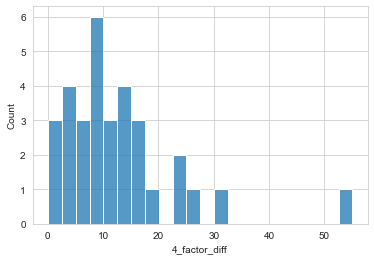

In [12]:
#Lets create a visual representation for our Round 1 matchups!

round_1_hist = sns.histplot(data=round_1, x='4_factor_diff', binwidth=2.5)
#round_1_hist.set(xlim=

round_1_hist

## 1st Round Results

From the 1st round using this data, we got 18 out 32 games correct. Some of the great calls we had in the 1st Round:

- 10th seed Furman beating 4-seed Virginia
- Correctly guessing every 1st round game in the West except for 1 matchup
- Correctly picking all 8 vs 9 seeds in the 1st round

Now for the misses in the 1st round:

- For the 2nd time ever in Tournement History. a 16-seed beat a 1-seed, Fairleigh Dickerson vs Purdue. (Good news is was only had Purdue advancing to the round of 32)
- These projections perdicted 11 upsets. out of those 11 upsets, we correctly guessed 1 of them.
- 2 of the 4 areas, we went 3 of 8 guessing the 1st round

The 1st round is important since this could setup your bracket for success or failure

## Overall Results

Overall we finished in the top 8% in both our pools. Lets go over some of the hits and misses overall. First the bad:

- We had Michigan State ranked as the 5th worst team and they made it to the Sweet 16
- Our tournamnet favorite Houston lost to Miami (FL) in the Sweet 16, Alabama also lost in the Sweet 16, Alabama was a top 5 team in our rankings
- Tennessee also got bumped out in the Round of 32, who was our 3rd strongest team

Let's go over some of our best hits that carried our bracket:

- Connecticut (UConn) making it to the championship! We had this 4 seed making it to the final 4 and they over delivered. The only reason why UConn wasnt in our Championship game is due to Houston being on the same side of the bracket, earning 15 points
- We called the West side of the bracket perfect except for a single round 1 game, earning 23 points
- We correctly guessed 10 out of the 16 teams in the Sweet 16, earning 20 points

Even though we had some misses, most other brackets had these same misses. Houston & Alabama were a 1-seed and were expected to go deep into the tournament.

# Conclusion

I was very happy with the results I got using this project. being in the top 8% of both of the pools I entered. If I had to change one thing, I would want to put more weight into teams that come from better confrences. We perdicted 11 upsets and correctly guessed 1 upset. I think putting more weight into what confrence, the team is coming from will help with our 1st round projections, since most of our upset projections came from teams from lower confrences

If you have any questions or feedback about my project, please reachout to me!